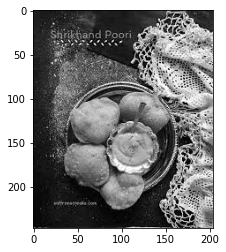

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/Users/harshinisaidonepudi/Downloads/food_image/Indian_Food_Images/Indian Food Images"

CATEGORIES = os.listdir(DATADIR)

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break

In [4]:
print(CATEGORIES)

['shrikhand', 'jalebi', 'biryani', 'bhindi_masala', 'imarti', 'pootharekulu', 'poha', 'doodhpak', 'sandesh', 'chapati', 'kakinada_khaja', 'adhirasam', 'dal_makhani', 'chicken_tikka_masala', 'dal_tadka', 'maach_jhol', 'dum_aloo', 'kajjikaya', 'poornalu', 'ras_malai', 'navrattan_korma', 'chikki', 'gavvalu', 'bhatura', 'chana_masala', 'kuzhi_paniyaram', 'cham_cham', 'double_ka_meetha', 'chicken_razala', 'phirni', 'bandar_laddu', 'misi_roti', 'shankarpali', 'chak_hao_kheer', 'sohan_halwa', 'pithe', 'aloo_shimla_mirch', 'paneer_butter_masala', 'kadai_paneer', 'daal_baati_churma', 'sohan_papdi', 'kalakand', 'rabri', 'sutar_feni', 'chicken_tikka', 'rasgulla', 'chhena_kheeri', 'kadhi_pakoda', 'mysore_pak', 'aloo_gobi', 'kofta', 'malapua', 'ledikeni', 'karela_bharta', 'dharwad_pedha', 'sheera', 'butter_chicken', 'ghevar', 'daal_puri', 'lyangcha', 'qubani_ka_meetha', 'kachori', 'aloo_matar', 'aloo_methi', 'litti_chokha', 'aloo_tikki', 'gulab_jamun', 'palak_paneer', 'basundi', 'boondi', 'naan', '

In [5]:
print(img_array)

[[ 34  34  33 ...  41  39  37]
 [ 34  34  33 ...  41  41  42]
 [ 34  33  32 ...  33  35  37]
 ...
 [  0   0   9 ...  97 112 147]
 [ 41  23  13 ... 169 164 167]
 [175 117  62 ... 161 170 184]]


In [6]:
print(img_array.shape)

(247, 204)


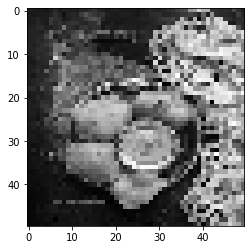

In [7]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 50/50 [00:00<00:00, 334.53it/s]

4000


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

26
70
14
68
22
5
73
2
59
16


In [11]:
X = []
y = []


for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y= np.asarray(y)


[[[[180]
   [179]
   [183]
   ...
   [176]
   [176]
   [174]]

  [[177]
   [183]
   [187]
   ...
   [176]
   [176]
   [178]]

  [[182]
   [184]
   [191]
   ...
   [182]
   [180]
   [179]]

  ...

  [[186]
   [202]
   [207]
   ...
   [218]
   [214]
   [203]]

  [[194]
   [187]
   [206]
   ...
   [213]
   [203]
   [201]]

  [[209]
   [206]
   [202]
   ...
   [203]
   [193]
   [216]]]]


In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2)

In [15]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 50, 50, 1)
(800, 50, 50, 1)
(3200,)
(800,)


<Figure size 432x288 with 0 Axes>

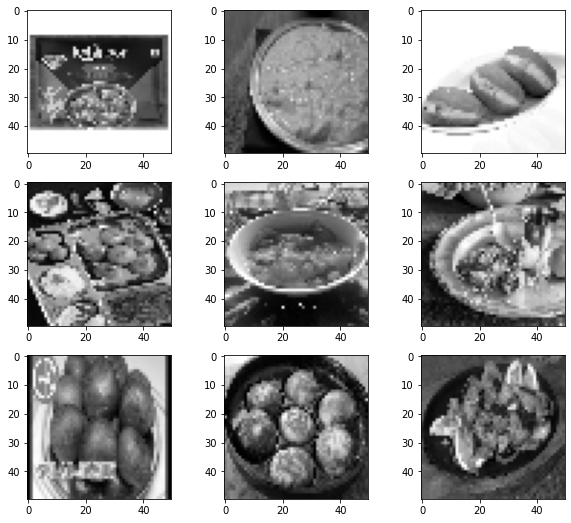

In [17]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])

In [18]:
for i in range(5):
    print(y_train[i])

37
46
26
39
60


In [19]:
print(X_train.min())
print(X_train.max())

0
255


In [20]:
# Data Normalization
# Conversion to float
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
# Normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [21]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [22]:
x_train = X_train.reshape(len(X_train),-1)
x_test = X_test.reshape(len(X_test),-1)

In [23]:
print(x_train.shape)
print(x_test.shape)

(3200, 2500)
(800, 2500)


In [24]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(x_train)

MiniBatchKMeans(n_clusters=80)

In [25]:
kmeans.labels_

array([35,  7, 11, ..., 65, 29,  7], dtype=int32)

In [26]:
def retrieve_info(cluster_labels,y_train):
    reference_labels = {}
# For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels


In [50]:
print(reference_labels)

{0: 0, 1: 36, 2: 43, 3: 0, 4: 52, 5: 19, 6: 56, 7: 12, 8: 24, 9: 53, 10: 38, 11: 48, 12: 11, 13: 49, 14: 19, 15: 40, 16: 66, 17: 3, 18: 5, 19: 46, 20: 18, 21: 28, 22: 29, 23: 62, 24: 69, 25: 70, 26: 65, 27: 68, 28: 25, 29: 23, 30: 48, 31: 77, 32: 7, 33: 16, 34: 50, 35: 53, 36: 8, 37: 22, 38: 53, 39: 18, 40: 0, 41: 23, 42: 79, 43: 52, 44: 75, 45: 2, 46: 77, 47: 54, 48: 40, 49: 52, 50: 10, 51: 63, 52: 17, 53: 33, 54: 16, 55: 13, 56: 4, 57: 12, 58: 7, 59: 29, 60: 23, 61: 59, 62: 67, 63: 12, 64: 24, 65: 51, 66: 29, 67: 59, 68: 2, 69: 4, 70: 39, 71: 13, 72: 70, 73: 59, 74: 76, 75: 58, 76: 15, 77: 40, 78: 57, 79: 37, 80: 38, 81: 13, 82: 15, 83: 7, 84: 31, 85: 37, 86: 47, 87: 46, 88: 2, 89: 41, 90: 48, 91: 31, 92: 42, 93: 68, 94: 74, 95: 26, 96: 58, 97: 79, 98: 8, 99: 71, 100: 55, 101: 52, 102: 33, 103: 26, 104: 8, 105: 31, 106: 29, 107: 45, 108: 14, 109: 63, 110: 20, 111: 20, 112: 9, 113: 62, 114: 61, 115: 54, 116: 36, 117: 22, 118: 42, 119: 41, 120: 3, 121: 38, 122: 30, 123: 3, 124: 18, 125

In [30]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [31]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[17 37  5 60 18 30 50 10 60 72  0 71 69 10 46 10  2 51  5 18]
[37 46 26 39 60 64 52 25 44 69 41 61 67 32  8 30 61 14 47 58]


In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.08625


In [33]:
def calculate_metrics(model,output):
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [34]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)
# Fitting the model to training set
    kmeans.fit(x_train)
# Calculating the metrics
 
    calculate_metrics(kmeans,y_train)
# Calculating reference_labels
    reference_labels = retrieve_info(kmeans.labels_,y_train)
# ‘number_labels’ is a list which denotes the number displayed in image
    number_labels = np.random.rand(len(kmeans.labels_))
    for i in range(len(kmeans.labels_)):
        number_labels[i] = reference_labels[kmeans.labels_[i]]
    print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
print('\n')

Number of clusters is 10
Inertia : 412727.5625
Homogeneity :       0.059777907377885214
Accuracy score : 0.03875
Number of clusters is 16
Inertia : 398798.6875
Homogeneity :       0.07580979537025824
Accuracy score : 0.04125
Number of clusters is 36
Inertia : 374180.9375
Homogeneity :       0.13236460363221803
Accuracy score : 0.058125
Number of clusters is 64
Inertia : 361254.1875
Homogeneity :       0.18548300276332336
Accuracy score : 0.07625
Number of clusters is 144
Inertia : 340748.46875
Homogeneity :       0.24149863308552438
Accuracy score : 0.1134375
Number of clusters is 256
Inertia : 319054.96875
Homogeneity :       0.30287614264081586


ValueError: attempt to get argmax of an empty sequence

In [35]:
kmeans = MiniBatchKMeans(n_clusters = 185)
# Fitting the model to testing set
kmeans.fit(x_test)
# Calculating the metrics
calculate_metrics(kmeans,y_test)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

Number of clusters is 185
Inertia : 65969.953125
Homogeneity :       0.4763321066520815
Accuracy score : 0.2875




In [36]:
centroids = kmeans.cluster_centers_

In [37]:
centroids.shape

(185, 2500)

In [37]:
centroids = centroids.reshape(185,50,50)

In [38]:
centroids = centroids * 255

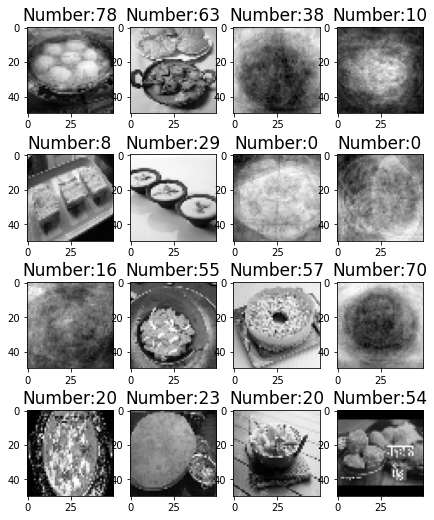

In [39]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
    plt.imshow(centroids[i])

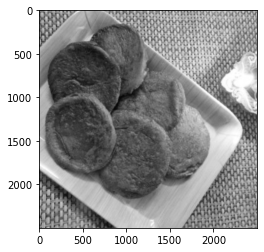

In [40]:
image = cv2.imread("/Users/harshinisaidonepudi/Downloads/test.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.show()

In [41]:
image.shape

(2500, 2500)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2)

In [43]:
print(X_train.min())
print(X_train.max())
print(image.min())
print(image.max())

0
255
6
255


In [44]:
X_train = X_train.astype('double')
X_train = X_train/255.0

In [45]:
X_train = X_train.reshape(3200,50*50)

In [46]:
kmeans = MiniBatchKMeans(n_clusters=185)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=185)

In [47]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [48]:
predicted_cluster = kmeans.predict(image)

In [49]:
number_labels[[predicted_cluster]]

/var/folders/tj/7jj2xt0n75x6hwvkzbth70_h0000gn/T/ipykernel_69790/3747928326.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  number_labels[[predicted_cluster]]


array([20., 20., 20., ..., 20., 20., 20.])